D:\gejun\Documents\Git\YuEbaoPrediction\LSTM_prediction


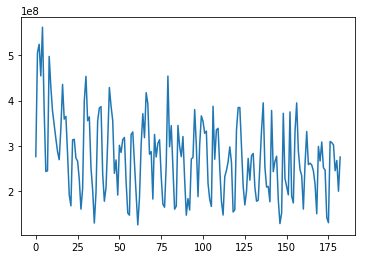

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 8)                 512       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100


 - 1s - loss: 0.0817


Epoch 2/100


 - 0s - loss: 0.0278


Epoch 3/100


 - 0s - loss: 0.0257


Epoch 4/100


 - 0s - loss: 0.0246


Epoch 5/100
 - 0s - loss: 0.0235


Epoch 6/100


 - 0s - loss: 0.0233


Epoch 7/100


 - 0s - loss: 0.0226


Epoch 8/100
 - 0s - loss: 0.0222


Epoch 9/100


 - 0s - loss: 0.0213


Epoch 10/100


 - 0s - loss: 0.0223


Epoch 11/100


 - 0s - loss: 0.0214


Epoch 12/100
 - 0s - loss: 0.0216


Epoch 13/100

 - 0s - loss: 0.0208


Epoch 14/100


 - 0s - loss: 0.0214


Epoch 15/100
 - 0s - loss: 0.0211


Epoch 16/100


 - 0s - loss: 0.0211


Epoch 17/100
 - 0s - loss: 0.0209


Epoch 18/100


 - 0s - loss: 0.0208


Epoch 19/100
 - 0s - loss: 0.0212


Epoch 20/100


 - 0s - loss: 0.0205


Epoch 21/100
 - 0s - loss: 0.0208


Epoch 22/100


 - 0s - loss: 0.0207


Epoch 23/100
 - 0s - loss: 0.0206


Epoch 24/100


 - 0s - loss: 0.0208


Epoch 25/100


 - 0s - loss: 0.0203


Epoch 26/100


 - 0s - loss: 0.0203


Epoch 27/100


 - 0s - loss: 0.0204


Epoch 28/100


 - 0s - loss: 0.0205


Epoch 29/100


 - 0s - loss: 0.0197


Epoch 30/100


 - 0s - loss: 0.0209


Epoch 31/100


 - 0s - loss: 0.0204


Epoch 32/100


 - 0s - loss: 0.0204


Epoch 33/100


 - 0s - loss: 0.0206


Epoch 34/100


 - 0s - loss: 0.0201


Epoch 35/100


 - 0s - loss: 0.0201


Epoch 36/100


 - 0s - loss: 0.0200


Epoch 37/100


 - 0s - loss: 0.0200


Epoch 38/100


 - 0s - loss: 0.0201


Epoch 39/100


 - 0s - loss: 0.0201


Epoch 40/100
 - 0s - loss: 0.0200


Epoch 41/100


 - 0s - loss: 0.0198


Epoch 42/100


 - 0s - loss: 0.0203


Epoch 43/100


 - 0s - loss: 0.0206


Epoch 44/100


 - 0s - loss: 0.0198


Epoch 45/100
 - 0s - loss: 0.0193


Epoch 46/100


 - 0s - loss: 0.0192


Epoch 47/100
 - 0s - loss: 0.0192


Epoch 48/100


 - 0s - loss: 0.0202


Epoch 49/100
 - 0s - loss: 0.0199


Epoch 50/100


 - 0s - loss: 0.0196


Epoch 51/100


 - 0s - loss: 0.0196


Epoch 52/100
 - 0s - loss: 0.0198


Epoch 53/100


 - 0s - loss: 0.0198


Epoch 54/100
 - 0s - loss: 0.0198


Epoch 55/100


 - 0s - loss: 0.0197


Epoch 56/100
 - 0s - loss: 0.0199


Epoch 57/100


 - 0s - loss: 0.0199


Epoch 58/100
 - 0s - loss: 0.0198


Epoch 59/100


 - 0s - loss: 0.0196


Epoch 60/100
 - 0s - loss: 0.0197


Epoch 61/100


 - 0s - loss: 0.0194


Epoch 62/100
 - 0s - loss: 0.0198


Epoch 63/100


 - 0s - loss: 0.0197


Epoch 64/100


 - 0s - loss: 0.0198


Epoch 65/100
 - 0s - loss: 0.0194


Epoch 66/100


 - 0s - loss: 0.0194


Epoch 67/100


 - 0s - loss: 0.0198


Epoch 68/100


 - 0s - loss: 0.0195


Epoch 69/100


 - 0s - loss: 0.0196


Epoch 70/100


 - 0s - loss: 0.0195


Epoch 71/100


 - 0s - loss: 0.0195


Epoch 72/100


 - 0s - loss: 0.0195


Epoch 73/100
 - 0s - loss: 0.0199


Epoch 74/100


 - 0s - loss: 0.0196


Epoch 75/100
 - 0s - loss: 0.0191


Epoch 76/100


 - 0s - loss: 0.0197


Epoch 77/100
 - 0s - loss: 0.0194


Epoch 78/100


 - 0s - loss: 0.0196


Epoch 79/100
 - 0s - loss: 0.0198


Epoch 80/100


 - 0s - loss: 0.0192


Epoch 81/100


 - 0s - loss: 0.0191


Epoch 82/100


 - 0s - loss: 0.0196


Epoch 83/100


 - 0s - loss: 0.0189


Epoch 84/100
 - 0s - loss: 0.0192


Epoch 85/100


 - 0s - loss: 0.0193


Epoch 86/100


 - 0s - loss: 0.0194


Epoch 87/100


 - 0s - loss: 0.0187


Epoch 88/100
 - 0s - loss: 0.0193


Epoch 89/100


 - 0s - loss: 0.0196


Epoch 90/100
 - 0s - loss: 0.0196


Epoch 91/100


 - 0s - loss: 0.0189


Epoch 92/100


 - 0s - loss: 0.0192


Epoch 93/100
 - 0s - loss: 0.0188


Epoch 94/100


 - 0s - loss: 0.0192


Epoch 95/100


 - 0s - loss: 0.0187


Epoch 96/100


 - 0s - loss: 0.0193


Epoch 97/100


 - 0s - loss: 0.0188


Epoch 98/100


 - 0s - loss: 0.0191


Epoch 99/100


 - 0s - loss: 0.0186


Epoch 100/100


 - 0s - loss: 0.0192


err: 0.220496783109
Train Score: 59027229.35 RMSE
Test Score: 62180818.71 RMSE


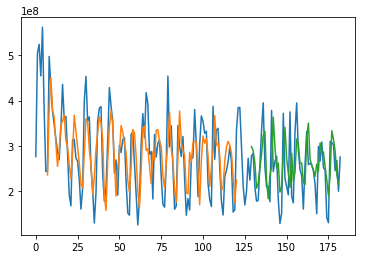

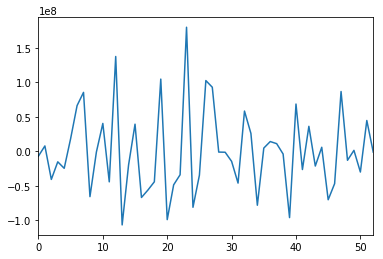

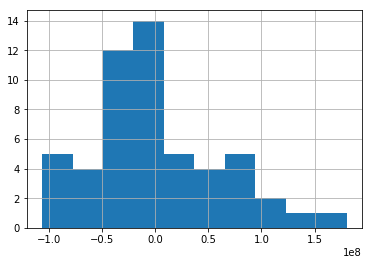

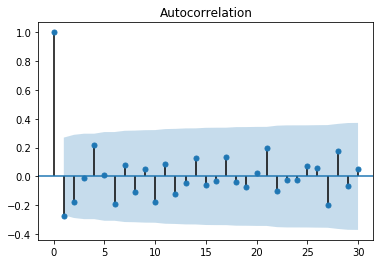

(array([  4.14925121,   5.95817849,   5.9690355 ,   8.77555326,
          8.78391074,  11.11237926,  11.50713146,  12.31242011,
         12.51033398,  14.62182594,  15.10137642,  16.1256211 ,
         16.26552499,  17.54165844]),
 array([ 0.04165294,  0.05083911,  0.11312647,  0.06696107,  0.11799991,
         0.08496469,  0.11797705,  0.13779933,  0.18604317,  0.14646969,
         0.17790276,  0.18554991,  0.23508848,  0.2284596 ]),
 array([  3.92292842,   5.60029735,   5.61016736,   8.11051954,
          8.11781334,  10.10759553,  10.43775192,  11.09662446,
         11.25495554,  12.90575835,  13.27196054,  14.03548839,
         14.13723667,  15.04213131]),
 array([ 0.04763184,  0.06080102,  0.13219588,  0.08761259,  0.14986111,
         0.12019346,  0.16509353,  0.19628421,  0.25863711,  0.22898882,
         0.27592251,  0.29844779,  0.3642506 ,  0.37528072]))

In [2]:
%cd D:\\gejun\\Documents\\Git\\YuEbaoPrediction\\LSTM_prediction

'''
申购的lstm
'''
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import keras.models
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from statsmodels.tsa.stattools import acf, pacf



import pandas as pd
from sklearn.externals import joblib
import os
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

# X is the number of passengers at a given time (t) and Y is the number of passengers at the next time (t + 1).
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=30)
    rolstd = pd.rolling_std(timeseries, window=30)

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

dataframe = read_csv('../file/group_by_date.csv', usecols=[3], engine='python')
dataframe = dataframe[244:]
dataset = dataframe.values
dataset = dataset.astype('float64')
plt.plot(dataset)
plt.show()

# fix random seed for reproducibility
np.random.seed(7)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# use this function to prepare the train and test datasets for modeling
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(8, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())
myfile = os.path.exists("lstm.model")
if myfile:
    print("ssss")
else:
    model_prob = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

errs = mape(testY[0],testPredict[:,0])
print("err:",errs)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainData = pd.DataFrame({'trainpredict':trainPredict[:,0],'actual':trainY[0]})
testData = pd.DataFrame({'testpredict':testPredict[:,0],'actual':testY[0]})
trainData.to_csv("../file/3_8_purchase_train.csv")
testData.to_csv("../file/3_8_purchase_test.csv")
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

test_df = read_csv('../file/3_8_purchase_test.csv', engine='python')
residual = test_df['actual'] - test_df['testpredict']
residual.describe()
mean = residual.mean()
mean_test_predict = test_df['testpredict'] + mean
mean_residual = test_df['actual'] - mean_test_predict
mean_residual.describe()

%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
mean_residual.plot()
plt.show()

# 直方图 是否正态分布
mean_residual.hist()
plt.show()

# autocorrelation
plot_acf(mean_residual, ax=plt.gca(), lags=30)
plt.show()

# LBQ 检验
from statsmodels.stats import diagnostic
diagnostic.acorr_ljungbox(mean_residual, lags=14, boxpierce=True)

